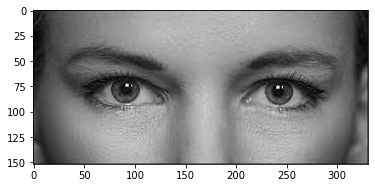

In [71]:
import cv2
import numpy as np
from scipy import ndimage
from scipy import signal
import matplotlib.pyplot as plt
img = cv2.imread(r'D:\download.jpg',0)
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

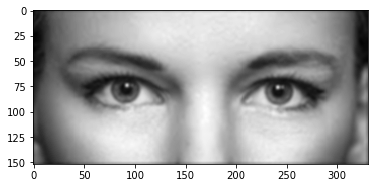

In [72]:
def gaussian(img):
    gaus_matrix = np.array(([2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]))
    gaus_matrix = gaus_matrix /159
    Res = ndimage.convolve(img, gaus_matrix)
    return Res
img = gaussian(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [73]:
def normalize(img):
    img = img/np.max(img)
    return img

In [74]:
def s_filter(img, direction):
    
    if(direction == 'x'):
        gx = np.array([[-1,0,+1], [-2,0,+2],  [-1,0,+1]])
        Res = signal.convolve2d(img, gx)
        
    if(direction == 'y'):
        gy = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
        Res = signal.convolve2d(img, gy)
            
    return Res

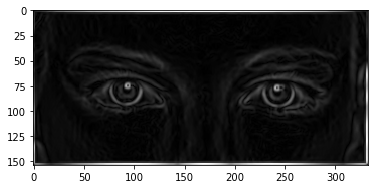

In [75]:
img_gx = s_filter(img,'x')
img_gx = normalize(img_gx)
img_gy = s_filter(img , 'y')
img_gy = normalize(img_gy)
img_g =  np.sqrt(img_gx**2+img_gy**2) #gradient magnitudes or edge strengths
img_g = normalize(img_g)    
grad = np.degrees(np.arctan2(img_gy,img_gx)) #direction of edges
plt.imshow(img_g, cmap = plt.get_cmap('gray'))

plt.show()

In [76]:
def Suppress(Gmag, Grad, Gx, Gy):
    NMS = np.zeros(Gmag.shape)
    
    for i in range(1, int(Gmag.shape[0]) - 1):
        for j in range(1, int(Gmag.shape[1]) - 1):
            if((Grad[i,j] >= 0 and Grad[i,j] <= 45) or (Grad[i,j] < -135 and Grad[i,j] >= -180)):
                c = np.array([Gmag[i,j+1], Gmag[i,j-1]])
                if (Gmag[i,j] >= c[0] and Gmag[i,j] >= c[1]):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] > 45 and Grad[i,j] <= 90) or (Grad[i,j] < -90 and Grad[i,j] >= -135)):
                c = np.array([Gmag[i-1,j-1], Gmag[i+1,j+1]])
                if (Gmag[i,j] >= c[0] and Gmag[i,j] >= c[1]):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] > 90 and Grad[i,j] <= 135) or (Grad[i,j] < -45 and Grad[i,j] >= -90)):
                c = np.array([Gmag[i-1,j],Gmag[i+1,j]])
                if (Gmag[i,j] >= c[0] and Gmag[i,j] >= c[1]):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] > 135 and Grad[i,j] <= 180) or (Grad[i,j] < 0 and Grad[i,j] >= -45)):
                c = np.array([Gmag[i-1,j+1],Gmag[i+1,j-1]])
                if (Gmag[i,j] >= c[0] and Gmag[i,j] >= c[1]):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
    
    return NMS
                
    

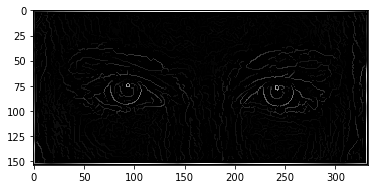

In [77]:
img_nms= Suppress(img_g,grad,img_gx,img_gy)
img_nms= normalize(img_nms)
plt.imshow(img_nms, cmap = plt.get_cmap('gray'))

plt.show()

In [78]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M):
        for j in range(1, N):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                        
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [79]:
def doub_threshold(img,l_thresh_ratio=0.04,h_thresh_ratio = 0.09):
    thresh_h = h_thresh_ratio*np.max(img)
    thresh_l = l_thresh_ratio*np.max(img)
    print(thresh_h,thresh_l)
    copy = np.ones((img.shape[0],img.shape[1]),dtype = np.int32)
    weak = 100
    strong = 255
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i,j]>thresh_h):
                copy[i,j] = strong
            elif(img[i,j]<thresh_l):
                copy[i,j] = 0
            else:
                copy[i,j]= weak
                
    return(copy,weak,strong)

In [80]:
a,b,c = doub_threshold(img_nms)
img_nms

0.09 0.04


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1546782 , 0.14957537, ..., 0.        , 0.14446299,
        0.        ],
       [0.        , 0.17631561, 0.        , ..., 0.        , 0.15158323,
        0.        ],
       ...,
       [0.        , 0.60307772, 0.        , ..., 0.        , 0.74612374,
        0.        ],
       [0.        , 0.53471486, 0.46831932, ..., 0.58189355, 0.64842774,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

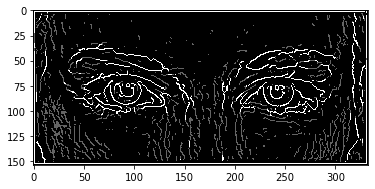

In [81]:
plt.imshow(a, cmap = plt.get_cmap('gray'))

plt.show()

In [82]:
d = hysteresis(a,b,c)

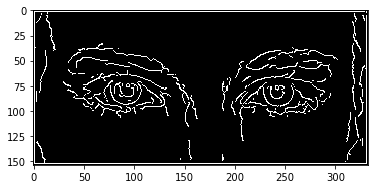

In [83]:
plt.imshow(a, cmap = plt.get_cmap('gray'))

plt.show()